# Medical Image Segmentation and Applications: Final Project 



Brain Tissue Segmentation with nn-Unet

Authors: 
  - Joaquin Oscar Seia
  - Kaouther Mouheb

Universitat de Girona - Fall 2022/23

## Set up

This notebook is meant to be run on Colab. 

First we need to connect to Google Drive to access the data. The folder misa_fp will be used as our base directory. This where we will clone the nn-Unet github repository and store our data. 

In [2]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive',force_remount = False)

Mounted at /content/drive


In [3]:
#setup a base directory where everything will be installed - repo, dataset, libraries
#This .ipynb notebook needs to placed there as well.
import os
base_dir = '/content/drive/MyDrive/misa_fp'
os.chdir(base_dir)

## Cloning nnUnet repo


Here we close the nn-Unet and Apex repositories to our base folder. 

Inside the nnUnet directory, we create a new trainer class namely nnUNetTrainerV2_Fast that inherits from the standard nnUNetTrainerV2 class but uses 30 epochs instead of 1000.

In [ ]:
#### RUN ONLY ONCE

# #comment after installed once
# !git clone https://github.com/MIC-DKFZ/nnUNet.git 
# !git clone https://github.com/NVIDIA/apex

Cloning into 'nnUNet'...
remote: Enumerating objects: 6048, done.
remote: Total 6048 (delta 0), reused 0 (delta 0), pack-reused 6048
Receiving objects: 100% (6048/6048), 1.50 MiB | 4.71 MiB/s, done.
Resolving deltas: 100% (4760/4760), done.
Checking out files: 100% (306/306), done.
Cloning into 'apex'...
remote: Enumerating objects: 10686, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 10686 (delta 120), reused 123 (delta 64), pack-reused 10478
Receiving objects: 100% (10686/10686), 15.21 MiB | 10.12 MiB/s, done.
Resolving deltas: 100% (7346/7346), done.
Checking out files: 100% (420/420), done.


## Libraries

In this part, we install and import libraries and packages that will be used in developing our code.

In [4]:
!pip install medpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 16.7 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-cp38-cp38-linux_x86_64.whl size=753445 sha256=67c68535640cb86bafe8641faf6e7c0abab5f989089fd907b1a1873d16cc1cc1
  Stored in directory: /root/.cache/pip/wheels/fc/38/7d/e0b8bcb2770f779a93cab5ab7fa6dd344011e1278cb90cab86
Successfully built medpy


In [5]:
respository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(respository_dir)

!pip install -e .
#(optional installation)
!pip install --upgrade git+https://github.com/nanohanno/hiddenlayer.git@bugfix/get_trace_graph#egg=hiddenlayer

os.chdir(base_dir)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/.shortcut-targets-by-id/1LfhRu5V8zfGC2QeWeGw16u76RN6Vv0w1/misa_fp/nnUNet
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 79.6 MB/s eta 0:00:00
  Created wheel for batchgenerators: filename=batchgenerators-0.24-py3-none-any.whl size=89209 sha256=4f23da0b899a25899c35ea553b5b02ffdd2580fbdf8097b4d290d6dc3553a012
  Stored in directory: /root/.cache/pip/wheels/ab/8e/1e/0cf24514ee9f8da66b92892fdc551bf6244eadbb6f25e47018

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nanohanno/hiddenlayer.git (to revision bugfix/get_trace_graph) to /tmp/pip-install-q_k959pn/hiddenlayer_35f2fd0b55804e53a27331a2a5bf60ad
  Running command git clone --filter=blob:none --quiet https://github.com/nanohanno/hiddenlayer.git /tmp/pip-install-q_k959pn/hiddenlayer_35f2fd0b55804e53a27331a2a5bf60ad
  Running command git checkout -b bugfix/get_trace_graph --track origin/bugfix/get_trace_graph
  Switched to a new branch 'bugfix/get_trace_graph'
  Branch 'bugfix/get_trace_graph' set up to track remote branch 'bugfix/get_trace_graph' from 'origin'.
  Resolved https://github.com/nanohanno/hiddenlayer.git to commit 321c5d934c6ed3a7e8d330bc4adcf7764bc440c3
  Preparing metadata (setup.py) ... done
  Created wheel for hiddenlayer: filename=hiddenlayer-0.2-py3-none-any.whl size=19748 sha256=e6966f5bf3f06168bc8822109e0020f03d82b280b484bd114a016224cb80d602
  Store

In [6]:
#libraries
import shutil
from collections import OrderedDict
import json
import numpy as np
import os

#visualization of the dataset
import matplotlib.pyplot as plt
import nibabel as nib

from medpy.metric.binary import hd, ravd
import pandas as pd
import seaborn as sns
import SimpleITK as sitk

In [7]:
#for colab only - keep the base directory same as above
base_dir = '/content/drive/MyDrive/misa_fp'
repository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(base_dir)

if os.getcwd()==base_dir:
    print('We are in the correct directory')
else:
    print("Run set base directory step again, then check to verify.")

Run set base directory step again, then check to verify.


## Helper functions 

In this part we create a set of helper functions that we will use to parse our data

In [8]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f'{folder_path} exists.')
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

In [9]:
def copy_and_rename(old_location, old_file_name, new_location, new_filename, delete_original = False):
    shutil.copy(os.path.join(old_location,old_file_name),new_location)
    os.rename(os.path.join(new_location,old_file_name),os.path.join(new_location,new_filename))
    if delete_original:
        os.remove(os.path.join(old_location,old_file_name))

Metrics

In [10]:
def haussdorf(gt: np.ndarray, pred: np.ndarray, voxelspacing: tuple):
    """Compute relative absolute volume difference across classes. The corresponding labels should be
    previously matched.
    Args:
        gt (np.ndarray): Grounth truth
        pred (np.ndarray): Labels
        voxelspacing (tuple): voxel_spacing
    Returns:
        list: Dice scores per tissue [CSF, GM, WM]
    """
    classes = np.unique(gt[gt != 0]).astype(int)
    hd_values = np.zeros((len(classes)))
    for i in classes:
        bin_pred = np.where(pred == i, 1, 0)
        bin_gt = np.where(gt == i, 1, 0)
        try:
            hd_values[i-1] = hd(bin_pred, bin_gt, voxelspacing=voxelspacing)
        except:
            hd_values[i-1] = np.nan
    return hd_values.tolist()


def avd(gt: np.ndarray, pred: np.ndarray, voxelspacing: tuple):
    """Compute relative absolute volume difference across classes. The corresponding labels should be
    previously matched.
    Args:
        gt (np.ndarray): Grounth truth
        pred (np.ndarray): Labels
        voxelspacing (tuple): voxel_spacing
    Returns:
        list: Dice scores per tissue [CSF, GM, WM]
    """
    classes = np.unique(gt[gt != 0]).astype(int)
    avd = np.zeros((len(classes)))
    for i in classes:
        bin_pred = np.where(pred == i, 1, 0)
        bin_gt = np.where(gt == i, 1, 0)
        vol_pred = np.count_nonzero(bin_pred)
        vol_gt = np.count_nonzero(bin_gt)
        unit_volume = voxelspacing[0] * voxelspacing[1] * voxelspacing[2]
        avd[i-1] = np.abs(vol_pred - vol_gt) * unit_volume
    return avd.tolist()


def rel_abs_vol_dif(gt: np.ndarray, pred: np.ndarray):
    """Compute relative absolute volume difference across classes. The corresponding labels should be
    previously matched.
    Args:
        gt (np.ndarray): Grounth truth
        pred (np.ndarray): Labels
    Returns:
        list: Dice scores per tissue [CSF, GM, WM]
    """
    classes = np.unique(gt[gt != 0]).astype(int)
    ravd_values = np.zeros((len(classes)))
    for i in classes:
        bin_pred = np.where(pred == i, 1, 0)
        bin_gt = np.where(gt == i, 1, 0)
        try:
            ravd_values[i-1] = ravd(bin_gt, bin_pred)
        except:
            ravd_values[i-1] = np.nan
    return ravd_values.tolist()

def dice_score(gt: np.ndarray, pred: np.ndarray):
    """Compute dice across classes. The corresponding labels should be
    previously matched.
    Args:
        gt (np.ndarray): Grounth truth
        pred (np.ndarray): Labels
    Returns:
        list: Dice scores per tissue [CSF, GM, WM]
    """
    classes = np.unique(gt[gt != 0])
    dice = np.zeros((len(classes)))
    for i in classes:
        bin_pred = np.where(pred == i, 1, 0)
        bin_gt = np.where(gt == i, 1, 0)
        dice[i-1] = np.sum(bin_pred[bin_gt == 1]) * 2.0 / (np.sum(bin_pred) + np.sum(bin_gt))
    return dice.tolist()

# Task 1: 3D Full-Resolution Versus 2D UNet

In this section, we will train both 3D full resolution UNet and 2D Unet using the original 10 train - 5 validation split of the ISBR dataset. Then we will compare the result of both models on the validation set.

## Structuring the task directory

In this section, we will copy and rename our images according to the structure required by nn-UNet. Both train and validation images will be transfered to imagesTr, the corresponding labels to labelsTr, whereas the test images will be stored in imagesTs.

We will use task ID 501 for this task.

In [ ]:
task_name = 'Task501_misa_fp' 
nnunet_dir = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_dir,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
main_dir = os.path.join(base_dir,'nnUNet/nnunet')

In [ ]:
make_if_dont_exist(task_folder_name,overwrite = False)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir,overwrite= False)
make_if_dont_exist(os.path.join(main_dir,'nnunet_trained_models'))

nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task501_misa_fp exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task501_misa_fp/imagesTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task501_misa_fp/labelsTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task501_misa_fp/imagesTs exists.
/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnunet_trained_models exists.


## Environment variables

We will need to set some environment variables to serve as shortcuts for the nnUnet to the necessary data folders.

In [ ]:
os.environ['nnUNet_raw_data_base'] = os.path.join(main_dir,'nnUNet_raw_data_base') # raw data foler 
os.environ['nnUNet_preprocessed'] = os.path.join(main_dir,'preprocessed') # preprocessed data folder
os.environ['RESULTS_FOLDER'] = os.path.join(main_dir,'nnUNet_trained_models') # folder to store training results (CV results, train logs...)

## Parsing data

In this section we will copy the raw ISBR data to the corresponding directories as previously explained.

In [ ]:
train_dir = '/content/drive/MyDrive/misa_fp/data/Training_Set' # original training set images 
val_dir = '/content/drive/MyDrive/misa_fp/data/Validation_Set' # original validation set images 
test_dir_or = '/content/drive/MyDrive/misa_fp/data/Test_Set' # original test set images 

In [ ]:
# Copy train images
for sample_id in os.listdir(train_dir):
  sample_location = os.path.join(train_dir, sample_id)
  img_name = f'{sample_id}.nii.gz'
  mask_name = f'{sample_id}_seg.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality
  new_mask_name = f'{sample_id}.nii.gz'

  # copy image to task folder
  copy_and_rename(sample_location, img_name, train_image_dir, new_img_name)
  # copy label to task folder
  copy_and_rename(sample_location, mask_name, train_label_dir, new_mask_name)
  print(f'{sample_id} copied')

IBSR_03 copied
IBSR_09 copied
IBSR_05 copied
IBSR_04 copied
IBSR_16 copied
IBSR_06 copied
IBSR_08 copied
IBSR_01 copied
IBSR_07 copied
IBSR_18 copied


In [ ]:
# Copy validation images
for sample_id in os.listdir(val_dir):
  sample_location = os.path.join(val_dir, sample_id)
  img_name = f'{sample_id}.nii.gz'
  mask_name = f'{sample_id}_seg.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality
  new_mask_name = f'{sample_id}.nii.gz'

  # copy image to task folder
  copy_and_rename(sample_location, img_name, train_image_dir, new_img_name)
  # copy label to task folder
  copy_and_rename(sample_location, mask_name, train_label_dir, new_mask_name)
  print(f'{sample_id} copied')

IBSR_13 copied
IBSR_14 copied
IBSR_11 copied
IBSR_17 copied
IBSR_12 copied


In [ ]:
# Copy test images
for sample_id in os.listdir(test_dir_or):
  sample_location = os.path.join(test_dir_or, sample_id)
  img_name = f'{sample_id}.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality

  # copy image to task folder
  copy_and_rename(sample_location, img_name, test_dir, new_img_name)

  print(f'{sample_id} copied')

IBSR_02 copied
IBSR_10 copied
IBSR_15 copied


Creating the dataset.json file required by nn-UNet which contains information about our custom dataset.

In [ ]:
overwrite_json_file = True #make it True if you want to overwrite the dataset.json file in Task_folder
json_file_exist = False

if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
    print('dataset.json already exist!')
    json_file_exist = True

if json_file_exist==False or overwrite_json_file:

    json_dict = OrderedDict()
    json_dict['name'] = task_name
    json_dict['description'] = "MISA Final Project Dataset: Brain tissue segmentation from MRI"
    json_dict['tensorImageSize'] = "3D"
    json_dict['reference'] = "see challenge website"
    json_dict['licence'] = "see challenge website"
    json_dict['release'] = "0.0"

    #you may mention more than one modality
    json_dict['modality'] = {
        "0": "MRI"
    }
    #labels+1 should be mentioned for all the labels in the dataset
    json_dict['labels'] = {
        "0": "background",
        "1": "CSF",
        "2": "GM",
        "3": "WM"
    }
    
    train_ids = os.listdir(train_label_dir)
    test_ids = os.listdir(test_dir)
    json_dict['numTraining'] = len(train_ids)
    json_dict['numTest'] = len(test_ids)

    #no modality in train image and labels in dataset.json 
    json_dict['training'] = [{'image': "./imagesTr/%s" % i, "label": "./labelsTr/%s" % i} for i in train_ids]

    #removing the modality from test image name to be saved in dataset.json
    json_dict['test'] = ["./imagesTs/%s" % (i[:i.find("_0000")]+'.nii.gz') for i in test_ids]

    with open(os.path.join(task_folder_name,"dataset.json"), 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=True)

    if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
        if json_file_exist==False:
            print('dataset.json created!')
        else: 
            print('dataset.json overwritten!')

dataset.json already exist!
dataset.json overwritten!


The last step of this section is to check if the structure of our dataset directory is compatible with nn-UNet's requirements.

In [ ]:
#running it from the experiment_planning folder to verify the path settings
os.chdir(main_dir)
!python experiment_planning/nnUNet_plan_and_preprocess.py -t 501 --verify_dataset_integrity
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case IBSR_03
checking case IBSR_09
checking case IBSR_05
checking case IBSR_04
checking case IBSR_16
checking case IBSR_06
checking case IBSR_08
checking case IBSR_01
checking case IBSR_07
checking case IBSR_18
checking case IBSR_13
checking case IBSR_14
checking case IBSR_11
checking case IBSR_17
checking case IBSR_12
Verifying label values
Expected label values are [0, 1, 2, 3]
Labels OK
Verifying test set
Dataset OK
IBSR_03
IBSR_09
IBSR_05
IBSR_04
IBSR_16
IBSR_06
IBSR_08
IBSR_01
IBSR_07
IBSR_18
IBSR_13
IBSR_14
IBSR_11
IBSR_17
IBSR_12



 Task501_misa_fp
number of threads:  (8, 8) 

using nonzero 

## Visualization

Now we will visualize example images from both training and test sets

(256, 128, 10, 1) (256, 128, 10, 1)


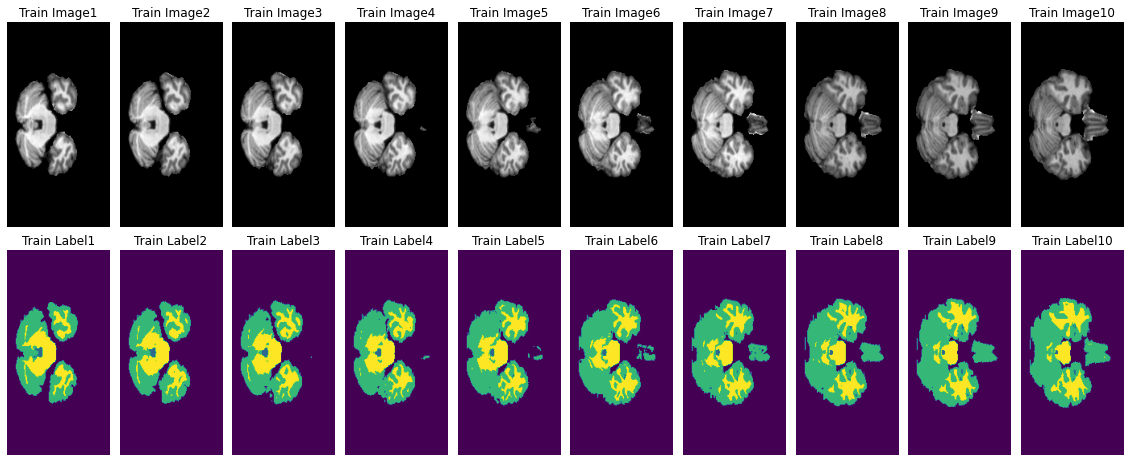

In [ ]:
#visualizing some of the training images and labels
# (re-run to see random pick-ups)
train_img_name = os.listdir(train_image_dir)[np.random.randint(0,10)]
train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)[:,:,100:110]
train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')]+'.nii.gz'
train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)[:,:,100:110]

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = train_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0 ,idx].imshow(train_img[:,:,idx].squeeze(), cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[:,:,idx].squeeze())

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

(256, 128, 5, 1)


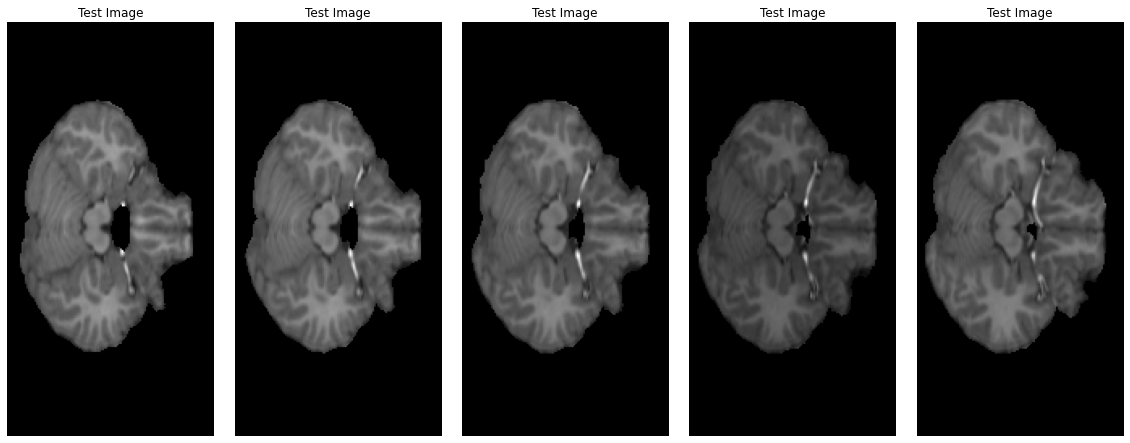

In [ ]:
#visualizing some of the test images
# (re-run to see random pick-ups)

test_img_name = os.listdir(test_dir)[np.random.randint(0,3)]
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,110:115]

print(test_img.shape)

max_cols = test_img.shape[2]
max_rows = 1

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,20))
for idx in range(max_cols):
    axes[ idx].axis("off") 
    axes[ idx].set_title('Test Image')
    axes[ idx].imshow(test_img[:,:,idx].squeeze(), cmap="gray")
    
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

## Creating Train-Val split

By default, nn-UNet creates a 5-fold cross-validation splits (5 folds). However, for this first task we would like to train using the original split of the IBSR dataset and compare the results obtained on the validation set. This is due to the heavy computation of the 3D full-resolution UNet which makes it hard to train for 5 folds.

We create a dictionary that contains two lists, train and validation, with the corresponding image IDs as provided in the challenge dataset. This dictionary will later be saved using pickle and used by nnUnet to train the models.

In [ ]:
train_list = []
for sample_id in os.listdir(train_dir):
  train_list.append(sample_id)

val_list = []
for sample_id in os.listdir(val_dir):
  val_list.append(sample_id)

print(train_list)
print(val_list)

['IBSR_03', 'IBSR_09', 'IBSR_05', 'IBSR_04', 'IBSR_16', 'IBSR_06', 'IBSR_08', 'IBSR_01', 'IBSR_07', 'IBSR_18']
['IBSR_13', 'IBSR_14', 'IBSR_11', 'IBSR_17', 'IBSR_12']


In [ ]:
splits = [
    {'train': train_list, 'val': val_list}
]

In [ ]:
import pickle
with open('/content/drive/MyDrive/misa_fp/nnUNet/nnunet/preprocessed/Task501_misa_fp/splits_final.pkl', 'wb') as handle:
    pickle.dump(splits, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Training

Now we can train the 2 networks. Note that nn-Unet saves a checkpoint at each epoch so we can resume from an old run. This feature is particularly useful for Colab which stops the training in the middle very often. This is acheived by adding the -c at the end of the training command.

### 3D U-Net Full Resolution

In [ ]:
# first part (stopped at ep 23)
os.chdir(main_dir)
!nnUNet_train 3d_fullres nnUNetTrainerV2_Fast 501 0 
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Fast.nnUNetTrainerV2_Fast'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 2, 'num_pool_per_axis': [4, 5, 5], 'patch_size': array([112, 128, 160]), 'median_patient_size_in_voxels': array([115, 139, 147]),

In [ ]:
#  second part (resume at ep 24)
os.chdir(main_dir)
!nnUNet_train 3d_fullres nnUNetTrainerV2_Fast 501 0 -c
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Fast.nnUNetTrainerV2_Fast'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 2, 'num_pool_per_axis': [4, 5, 5], 'patch_size': array([112, 128, 160]), 'median_patient_size_in_voxels': array([115, 139, 147]),

### 2D U-Net

In [ ]:
# First run (finished)
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Fast 501 0
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Fast.nnUNetTrainerV2_Fast'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 69, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 147]), 'current_spaci

### Cascaded 3D U-Net

As seen below, we also tried running the cascaded version on nnUnet however it was deemed unnecessary by the framework.

In [ ]:
os.chdir(main_dir)
!nnUNet_train 3d_lowres nnUNetTrainerV2_Fast 501 0
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Traceback (most recent call last):
  File "/usr/local/bin/nnUNet_train", line 33, in <module>
    sys.exit(load_entry_point('nnunet', 'console_scripts', 'nnUNet_train')())
  File "/content/drive/.shortcut-targets-by-id/1LfhRu5V8zfGC2QeWeGw16u76RN6Vv0w1/misa_fp/nnUNet/nnunet/run/run_training.py", line 137, in main
    trainer_class = get_default_configuration(network, task, network_trainer, plans_identifier)
  File "/content/drive/.shortcut-targets-by-id/1LfhRu5V8zfGC2QeWeGw16u76RN6Vv0w1/misa_fp/nnUNet/nnunet/run/default_configuration.py", line 51, in get_default_configuration
    raise RuntimeError("3d_lowres/3d_cascade_fullres on

## Comparison

In this section, we will calculate several metrics from the results obtained on the validation set for each model and compare the results.

In [52]:
gt_path_2d = '/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/Task501_misa_fp/nnUNetTrainerV2_Fast__nnUNetPlansv2.1/gt_niftis'
preds_path_2d = '/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/Task501_misa_fp/nnUNetTrainerV2_Fast__nnUNetPlansv2.1/fold_0/validation_raw_postprocessed'
preds_path_3d = '/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_trained_models/nnUNet/3d_fullres/Task501_misa_fp/nnUNetTrainerV2_Fast__nnUNetPlansv2.1/fold_0/validation_raw_postprocessed'


val_list = ['IBSR_13', 'IBSR_14', 'IBSR_11', 'IBSR_17', 'IBSR_12']
avd_list = []
hd_list = []
ravd_list = []
dice_list = []

In [53]:
# 2D
for img_id in val_list:
  gt = sitk.ReadImage(f'{gt_path_2d}/{img_id}.nii.gz')
  vspace = gt.GetSpacing()
  gt = sitk.GetArrayFromImage(gt)
  pred = sitk.GetArrayFromImage(sitk.ReadImage(f'{preds_path_2d}/{img_id}.nii.gz'))

  hd_list.append(haussdorf(gt, pred, vspace) + [img_id , '2D U-Net'])
  avd_list.append(avd(gt, pred, vspace) + [img_id, '2D U-Net'])
  ravd_list.append(rel_abs_vol_dif(gt, pred) + [img_id, '2D U-Net'])
  dice_list.append(dice_score(gt, pred) + [img_id, '2D U-Net'])

# 3D
for img_id in val_list:
  gt = sitk.ReadImage(f'{gt_path_2d}/{img_id}.nii.gz')
  vspace = gt.GetSpacing()
  gt = sitk.GetArrayFromImage(gt)
  pred = sitk.GetArrayFromImage(sitk.ReadImage(f'{preds_path_3d}/{img_id}.nii.gz'))

  hd_list.append(haussdorf(gt, pred, vspace) + [img_id , '3D U-Net'])
  avd_list.append(avd(gt, pred, vspace) + [img_id, '3D U-Net'])
  ravd_list.append(rel_abs_vol_dif(gt, pred) + [img_id, '3D U-Net'])
  dice_list.append(dice_score(gt, pred) + [img_id, '3D U-Net'])

In [54]:
columns = ['CSF', 'GM', 'WM', 'Case', 'Model']
dice_scores_df = pd.DataFrame(data=dice_list, columns=columns)
dice_scores_df.to_csv('/content/drive/MyDrive/misa_fp/results/dice.csv')

avd_df = pd.DataFrame(data=avd_list, columns=columns)
avd_df.to_csv('/content/drive/MyDrive/misa_fp/results/avd.csv')

ravd_df = pd.DataFrame(data=ravd_list, columns=columns)
ravd_df.to_csv('/content/drive/MyDrive/misa_fp/results/ravd.csv')

hd_df = pd.DataFrame(data=hd_list, columns=columns)
hd_df.to_csv('/content/drive/MyDrive/misa_fp/results/hd.csv')

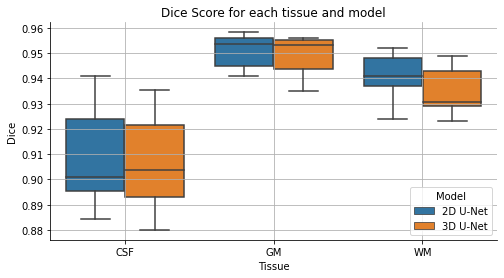

In [55]:
df = pd.melt(dice_scores_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'Dice']

plt.figure(figsize=(8,4))
plt.title('Dice Score for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="Dice", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='lower right', title='Model')
plt.show()

In [56]:
df[['Model', 'Tissue', 'Dice',]].groupby(['Model', 'Tissue']).mean()

Dice
Model    Tissue          
2D U-Net CSF     0.909105
         GM      0.950853
         WM      0.940484
3D U-Net CSF     0.906772
         GM      0.948705
         WM      0.934876

In [57]:
df[['Model', 'Tissue', 'Dice',]].groupby(['Model', 'Tissue']).std()

Dice
Model    Tissue          
2D U-Net CSF     0.022970
         GM      0.007502
         WM      0.010957
3D U-Net CSF     0.022052
         GM      0.009138
         WM      0.010518

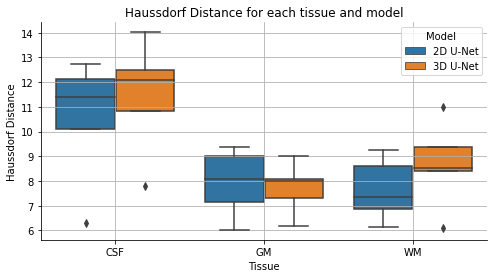

In [58]:
df = pd.melt(hd_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'Haussdorf Distance']

plt.figure(figsize=(8,4))
plt.title('Haussdorf Distance for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="Haussdorf Distance", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='upper right', title='Model')
plt.show()

In [59]:
df[['Model', 'Tissue', 'Haussdorf Distance',]].groupby(['Model', 'Tissue']).mean()

Haussdorf Distance
Model    Tissue                    
2D U-Net CSF              10.531409
         GM                7.923903
         WM                7.639348
3D U-Net CSF              11.440340
         GM                7.714956
         WM                8.684301

In [60]:
df[['Model', 'Tissue', 'Haussdorf Distance',]].groupby(['Model', 'Tissue']).std()

Haussdorf Distance
Model    Tissue                    
2D U-Net CSF               2.568064
         GM                1.373132
         WM                1.258520
3D U-Net CSF               2.340071
         GM                1.047921
         WM                1.770859

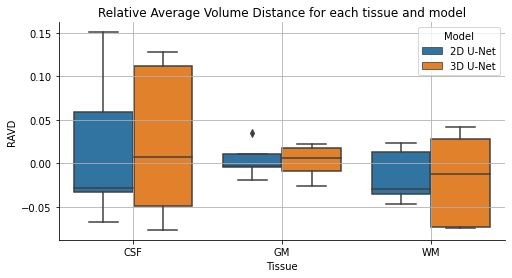

In [61]:
df = pd.melt(ravd_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'RAVD']

plt.figure(figsize=(8,4))
plt.title('Relative Average Volume Distance for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="RAVD", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='upper right', title='Model')
plt.show()

In [62]:
df[['Model', 'Tissue', 'RAVD',]].groupby(['Model', 'Tissue']).mean()

RAVD
Model    Tissue          
2D U-Net CSF     0.016166
         GM      0.003866
         WM     -0.014896
3D U-Net CSF     0.024168
         GM      0.002371
         WM     -0.017889

In [63]:
df[['Model', 'Tissue', 'RAVD',]].groupby(['Model', 'Tissue']).std()

RAVD
Model    Tissue          
2D U-Net CSF     0.088367
         GM      0.020358
         WM      0.030999
3D U-Net CSF     0.092643
         GM      0.019737
         WM      0.054735

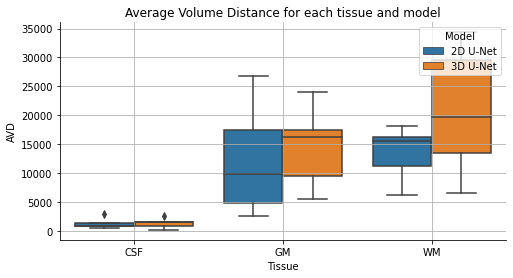

In [64]:
df = pd.melt(avd_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'AVD']

plt.figure(figsize=(8,4))
plt.title('Average Volume Distance for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="AVD", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='upper right', title='Model')
plt.show()

In [65]:
df[['Model', 'Tissue', 'AVD',]].groupby(['Model', 'Tissue']).mean()

AVD
Model    Tissue              
2D U-Net CSF      1283.210217
         GM      12294.718501
         WM      13440.907087
3D U-Net CSF      1316.327510
         GM      14543.325830
         WM      20706.621872

In [66]:
df[['Model', 'Tissue', 'AVD',]].groupby(['Model', 'Tissue']).std()

AVD
Model    Tissue              
2D U-Net CSF       989.019570
         GM       9949.644415
         WM       4783.076781
3D U-Net CSF       889.805790
         GM       7260.412427
         WM      11403.443124

We can see that overall, 2D U-Net performs slightly better than the 3D full-resolution U-Net. It is also faster to train. We will proceed with 2D U-Net for the next tasks.

# Task 2: 2D U-Net with Full Data and 5-Fold CV

In this task (ID=505), we will retrain the 2D U-Net with 5-Fold cross validation. This will give better insight on the model's performance than the classical train-validation set approach. It will also enable the selection of post-processing techniques by the nn-UNet framework (this is not done if the model is not trained with 5-fold CV). The same steps followed in the previous task will be followed in this one. The only difference is that we will train for 5 folds instead of 1.

## Structuring the task directory

In [ ]:
task_name = 'Task505_misa_fp' 
nnunet_dir = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_dir,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
main_dir = os.path.join(base_dir,'nnUNet/nnunet')

In [ ]:
make_if_dont_exist(task_folder_name,overwrite = False)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir,overwrite= False)
make_if_dont_exist(os.path.join(main_dir,'nnunet_trained_models'))

nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task505_misa_fp exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task505_misa_fp/imagesTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task505_misa_fp/labelsTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task505_misa_fp/imagesTs exists.
/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnunet_trained_models exists.


## Environment variables

In [ ]:
os.environ['nnUNet_raw_data_base'] = os.path.join(main_dir,'nnUNet_raw_data_base')
os.environ['nnUNet_preprocessed'] = os.path.join(main_dir,'preprocessed')
os.environ['RESULTS_FOLDER'] = os.path.join(main_dir,'nnUNet_trained_models')

## Parsing the data

In [ ]:
train_dir = '/content/drive/MyDrive/misa_fp/data/Training_Set'
val_dir = '/content/drive/MyDrive/misa_fp/data/Validation_Set'
test_dir_or = '/content/drive/MyDrive/misa_fp/data/Test_Set'

In [ ]:
for sample_id in os.listdir(train_dir):
  sample_location = os.path.join(train_dir, sample_id)
  img_name = f'{sample_id}.nii.gz'
  mask_name = f'{sample_id}_seg.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality
  new_mask_name = f'{sample_id}.nii.gz'

  # copy image to task folder
  copy_and_rename(sample_location, img_name, train_image_dir, new_img_name)
  # copy label to task folder
  copy_and_rename(sample_location, mask_name, train_label_dir, new_mask_name)
  print(f'{sample_id} copied')

IBSR_03 copied
IBSR_09 copied
IBSR_05 copied
IBSR_04 copied
IBSR_16 copied
IBSR_06 copied
IBSR_08 copied
IBSR_01 copied
IBSR_07 copied
IBSR_18 copied


In [ ]:
for sample_id in os.listdir(val_dir):
  sample_location = os.path.join(val_dir, sample_id)
  img_name = f'{sample_id}.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality

  # copy image to task folder
  copy_and_rename(sample_location, img_name, test_dir, new_img_name)

  print(f'{sample_id} copied')

IBSR_13 copied
IBSR_14 copied
IBSR_11 copied
IBSR_17 copied
IBSR_12 copied


In [ ]:
for sample_id in os.listdir(test_dir_or):
  sample_location = os.path.join(test_dir_or, sample_id)
  img_name = f'{sample_id}.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality

  # copy image to task folder
  copy_and_rename(sample_location, img_name, test_dir, new_img_name)

  print(f'{sample_id} copied')

IBSR_02 copied
IBSR_10 copied
IBSR_15 copied


Creating dataset.json

In [ ]:
overwrite_json_file = True #make it True if you want to overwrite the dataset.json file in Task_folder
json_file_exist = False

if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
    print('dataset.json already exist!')
    json_file_exist = True

if json_file_exist==False or overwrite_json_file:

    json_dict = OrderedDict()
    json_dict['name'] = task_name
    json_dict['description'] = "MISA Final Project Dataset: Brain tissue segmentation from MRI, 2D with all data"
    json_dict['tensorImageSize'] = "3D"
    json_dict['reference'] = "see challenge website"
    json_dict['licence'] = "see challenge website"
    json_dict['release'] = "0.0"

    #you may mention more than one modality
    json_dict['modality'] = {
        "0": "MRI"
    }
    #labels+1 should be mentioned for all the labels in the dataset
    json_dict['labels'] = {
        "0": "background",
        "1": "CSF",
        "2": "GM",
        "3": "WM"
    }
    
    train_ids = os.listdir(train_label_dir)
    test_ids = os.listdir(test_dir)
    json_dict['numTraining'] = len(train_ids)
    json_dict['numTest'] = len(test_ids)

    #no modality in train image and labels in dataset.json 
    json_dict['training'] = [{'image': "./imagesTr/%s" % i, "label": "./labelsTr/%s" % i} for i in train_ids]

    #removing the modality from test image name to be saved in dataset.json
    json_dict['test'] = ["./imagesTs/%s" % (i[:i.find("_0000")]+'.nii.gz') for i in test_ids]

    with open(os.path.join(task_folder_name,"dataset.json"), 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=True)

    if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
        if json_file_exist==False:
            print('dataset.json created!')
        else: 
            print('dataset.json overwritten!')

dataset.json already exist!
dataset.json overwritten!


Check dataset

In [ ]:
#running it from the experiment_planning folder to verify the path settings
os.chdir(main_dir)
!python experiment_planning/nnUNet_plan_and_preprocess.py -t 505 --verify_dataset_integrity
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case IBSR_03
checking case IBSR_09
checking case IBSR_16
checking case IBSR_05
checking case IBSR_06
checking case IBSR_04
checking case IBSR_18
checking case IBSR_08
checking case IBSR_01
checking case IBSR_07
Verifying label values
Expected label values are [0, 1, 2, 3]
Labels OK
Verifying test set
Dataset OK
IBSR_03
IBSR_09
IBSR_16
IBSR_05
IBSR_06
IBSR_04
IBSR_18
IBSR_08
IBSR_01
IBSR_07



 Task505_misa_fp
number of threads:  (8, 8) 

using nonzero mask for normalization
Are we using the nonzero mask for normalization? OrderedDict([(0, True)])
the median shape of the dataset is  [138.83333333 115

## Train

### Fold 1

In [ ]:
# First fold => Done
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 505 0
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 2

In [ ]:
# Second fold 
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 505 1
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 3

In [ ]:
# Third fold
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 505 2
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 4

In [ ]:
# Fourth fold (stopped at ep 08)
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 505 3
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

In [ ]:
# Fourth fold (resume from ep 09)
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 505 3 -c
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 5

In [ ]:
# Fifth fold
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 505 4
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

## Inference on the validation set

In [ ]:
!nnUNet_determine_postprocessing -t 505 -m 2d



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Foreground vs background
before: 0.9274546279750591
after:  0.9274555967721589
Removing all but the largest foreground region improved results!
for_which_classes [1, 2, 3]
min_valid_object_sizes None
1
before: 0.9014124858184116
after:  0.8491021605458385
2
before: 0.9441651134648674
after:  0.9441834291955112
Removing all but the largest region for class 2 improved results!
min_valid_object_sizes None
3
before: 0.9367891910331977
after:  0.8914616946170557
done
for which classes:
[[1, 2, 3], 2]
min_object_sizes
None
done


In [ ]:
result_dir = os.path.join(main_dir,'nnUNet_Predictions', task_name)
make_if_dont_exist(result_dir)
team_name = 'JoaKaou'
#location where you want save your results, will be created if dont exist
os.chdir(main_dir)
!nnUNet_predict -i /content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task505_misa_fp/imagesTs -o nnUNet_Predictions/Task505_misa_fp -t 505 -tr nnUNetTrainerV2 -m 2d --num_threads_preprocessing 1
os.chdir(base_dir)

/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_Predictions/Task505_misa_fp created!


Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/Task505_misa_fp/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 8 unique case ids, here are some examples: ['IBSR_14' 'IBSR_14' 'IBSR_15' 'IBSR_13' 'IBSR_02' 'IBSR_14' 'IBSR_15'
 'IBSR_02']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 8
number of cases that still need to be predicted: 8
emptying cuda cache
loading parameters fo

# Task 3: 2D-UNet + Bias field correction

In this task (ID=508), we will train the model with the images after applying bias field correction using n4 from SimpleITK.

## Structuring the task directory

In [12]:
task_name = 'Task508_misa_fp' 
nnunet_dir = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_dir,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
main_dir = os.path.join(base_dir,'nnUNet/nnunet')

In [ ]:
make_if_dont_exist(task_folder_name,overwrite = False)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir,overwrite= False)
make_if_dont_exist(os.path.join(main_dir,'nnunet_trained_models'))

nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task508_misa_fp exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task508_misa_fp/imagesTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task508_misa_fp/labelsTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task508_misa_fp/imagesTs exists.
/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnunet_trained_models exists.


## Environment variables

In [ ]:
os.environ['nnUNet_raw_data_base'] = os.path.join(main_dir,'nnUNet_raw_data_base')
os.environ['nnUNet_preprocessed'] = os.path.join(main_dir,'preprocessed')
os.environ['RESULTS_FOLDER'] = os.path.join(main_dir,'nnUNet_trained_models')

## Parsing the data

In [ ]:
train_dir = '/content/drive/MyDrive/misa_fp/data_preprocessed/train_set_n4'
val_dir = '/content/drive/MyDrive/misa_fp/data_preprocessed/val_set_n4'
test_dir_or = '/content/drive/MyDrive/misa_fp/data_preprocessed/test_set_n4'

In [ ]:
for sample_id in os.listdir(train_dir):
  sample_location = os.path.join(train_dir, sample_id)
  img_name = f'{sample_id}_n4.nii.gz'
  mask_name = f'{sample_id}_seg.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality
  new_mask_name = f'{sample_id}.nii.gz'

  # copy image to task folder
  copy_and_rename(sample_location, img_name, train_image_dir, new_img_name)
  # copy label to task folder
  copy_and_rename(sample_location, mask_name, train_label_dir, new_mask_name)
  print(f'{sample_id} copied')

In [ ]:
for sample_id in os.listdir(val_dir):
  sample_location = os.path.join(val_dir, sample_id)
  img_name = f'{sample_id}_n4.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality

  # copy image to task folder
  copy_and_rename(sample_location, img_name, test_dir, new_img_name)

  print(f'{sample_id} copied')

In [ ]:
for sample_id in os.listdir(test_dir_or):
  sample_location = os.path.join(test_dir_or, sample_id)
  img_name = f'{sample_id}_n4.nii.gz'

  new_img_name = f'{sample_id}_0000.nii.gz' #0000 for modality

  # copy image to task folder
  copy_and_rename(sample_location, img_name, test_dir, new_img_name)

  print(f'{sample_id} copied')

IBSR_02 copied
IBSR_10 copied
IBSR_15 copied


Creating dataset.json

In [ ]:
overwrite_json_file = True #make it True if you want to overwrite the dataset.json file in Task_folder
json_file_exist = False

if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
    print('dataset.json already exist!')
    json_file_exist = True

if json_file_exist==False or overwrite_json_file:

    json_dict = OrderedDict()
    json_dict['name'] = task_name
    json_dict['description'] = "MISA Final Project Dataset: Brain tissue segmentation from MRI, 2D with all data, bias field corrected"
    json_dict['tensorImageSize'] = "3D"
    json_dict['reference'] = "see challenge website"
    json_dict['licence'] = "see challenge website"
    json_dict['release'] = "0.0"

    #you may mention more than one modality
    json_dict['modality'] = {
        "0": "MRI"
    }
    #labels+1 should be mentioned for all the labels in the dataset
    json_dict['labels'] = {
        "0": "background",
        "1": "CSF",
        "2": "GM",
        "3": "WM"
    }
    
    train_ids = os.listdir(train_label_dir)
    test_ids = os.listdir(test_dir)
    json_dict['numTraining'] = len(train_ids)
    json_dict['numTest'] = len(test_ids)

    #no modality in train image and labels in dataset.json 
    json_dict['training'] = [{'image': "./imagesTr/%s" % i, "label": "./labelsTr/%s" % i} for i in train_ids]

    #removing the modality from test image name to be saved in dataset.json
    json_dict['test'] = ["./imagesTs/%s" % (i[:i.find("_0000")]+'.nii.gz') for i in test_ids]

    with open(os.path.join(task_folder_name,"dataset.json"), 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=True)

    if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
        if json_file_exist==False:
            print('dataset.json created!')
        else: 
            print('dataset.json overwritten!')

dataset.json already exist!
dataset.json overwritten!


Check dataset

In [ ]:
#running it from the experiment_planning folder to verify the path settings
os.chdir(main_dir)
!python experiment_planning/nnUNet_plan_and_preprocess.py -t 508 --verify_dataset_integrity
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case IBSR_09
checking case IBSR_08
checking case IBSR_06
checking case IBSR_01
checking case IBSR_05
checking case IBSR_18
checking case IBSR_04
checking case IBSR_16
checking case IBSR_07
checking case IBSR_03
Verifying label values
Expected label values are [0, 1, 2, 3]
Labels OK
Verifying test set
Dataset OK
IBSR_09
IBSR_08
IBSR_06
IBSR_01
IBSR_05
IBSR_18
IBSR_04
IBSR_16
IBSR_07
IBSR_03



 Task508_misa_fp
number of threads:  (8, 8) 

using nonzero mask for normalization
Are we using the nonzero mask for normalization? OrderedDict([(0, True)])
the median shape of the dataset is  [138.83333333 115

## Train

### Fold 1

In [ ]:
# First fold 
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 508 0
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 2

In [ ]:
# Second fold 
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 508 1
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 3

In [ ]:
# Third fold
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 508 2
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 4

In [ ]:
# Fourth fold
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 508 3
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

### Fold 5

In [ ]:
# Fifth fold
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2_Faster 508 4
os.chdir(base_dir)



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2_Faster.nnUNetTrainerV2_Faster'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 45, 'num_pool_per_axis': [5, 5], 'patch_size': array([160, 160]), 'median_patient_size_in_voxels': array([115, 139, 144]), 'current_s

## Inference on the validation set

In [ ]:
!nnUNet_determine_postprocessing -t 508 -m 2d



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Foreground vs background
before: 0.9241120198277898
after:  0.924112906226869
Removing all but the largest foreground region improved results!
for_which_classes [1, 2, 3]
min_valid_object_sizes None
1
before: 0.8999759430913772
after:  0.8423231030499707
2
before: 0.9419115478154512
after:  0.9419253831181029
Removing all but the largest region for class 2 improved results!
min_valid_object_sizes None
3
before: 0.9304512277737785
after:  0.8844829227927052
done
for which classes:
[[1, 2, 3], 2]
min_object_sizes
None
done


In [ ]:
result_dir = os.path.join(main_dir,'nnUNet_Predictions', task_name)
make_if_dont_exist(result_dir)
team_name = 'JoaKaou'
#location where you want save your results, will be created if dont exist
os.chdir(main_dir)
!nnUNet_predict -i /content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task508_misa_fp/imagesTs -o nnUNet_Predictions/Task508_misa_fp -t 508 -tr nnUNetTrainerV2 -m 2d --num_threads_preprocessing 1
os.chdir(base_dir)

/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_Predictions/Task508_misa_fp exists.


Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/Task508_misa_fp/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 8 unique case ids, here are some examples: ['IBSR_15' 'IBSR_17' 'IBSR_10' 'IBSR_10' 'IBSR_10' 'IBSR_13' 'IBSR_15'
 'IBSR_10']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 8
number of cases that still need to be predicted: 8
emptying cuda cache
loading parameters for

# Comparison: Task 2 Vs Task 3

In [ ]:
gt_path = '/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/Task503_misa_fp/nnUNetTrainerV2_Fast__nnUNetPlansv2.1/gt_niftis'
preds_path_2 = '/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_Predictions/Task505_misa_fp'
preds_path_3 = '/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_Predictions/Task508_misa_fp'
img_list = ['IBSR_13', 'IBSR_14', 'IBSR_11', 'IBSR_17', 'IBSR_12']
avd_list = []
hd_list = []
ravd_list = []
dice_list = []

In [ ]:
# Task 2
for img_id in img_list:
  gt = sitk.ReadImage(f'{gt_path}/{img_id}.nii.gz')
  vspace = gt.GetSpacing()
  gt = sitk.GetArrayFromImage(gt)
  pred = sitk.GetArrayFromImage(sitk.ReadImage(f'{preds_path_2}/{img_id}.nii.gz'))

  hd_list.append(haussdorf(gt, pred, vspace) + [img_id , 'nn-UNet'])
  avd_list.append(avd(gt, pred, vspace) + [img_id, 'nn-UNet'])
  ravd_list.append(rel_abs_vol_dif(gt, pred) + [img_id, 'nn-UNet'])
  dice_list.append(dice_score(gt, pred) + [img_id, 'nn-UNet'])

# Task 3
for img_id in img_list:
  gt = sitk.ReadImage(f'{gt_path}/{img_id}.nii.gz')
  vspace = gt.GetSpacing()
  gt = sitk.GetArrayFromImage(gt)
  pred = sitk.GetArrayFromImage(sitk.ReadImage(f'{preds_path_3}/{img_id}.nii.gz'))

  hd_list.append(haussdorf(gt, pred, vspace) + [img_id , 'N4+nn-UNet'])
  avd_list.append(avd(gt, pred, vspace) + [img_id, 'N4+nn-UNet'])
  ravd_list.append(rel_abs_vol_dif(gt, pred) + [img_id, 'N4+nn-UNet'])
  dice_list.append(dice_score(gt, pred) + [img_id, 'N4+nn-UNet'])

In [ ]:
columns = ['CSF', 'GM', 'WM', 'Case', 'Model']
dice_scores_df = pd.DataFrame(data=dice_list, columns=columns)
dice_scores_df.to_csv('/content/drive/MyDrive/misa_fp/results/dice_n4_0.csv')

avd_df = pd.DataFrame(data=avd_list, columns=columns)
avd_df.to_csv('/content/drive/MyDrive/misa_fp/results/avd_n4_0.csv')

ravd_df = pd.DataFrame(data=ravd_list, columns=columns)
ravd_df.to_csv('/content/drive/MyDrive/misa_fp/results/ravd_n4_0.csv')

hd_df = pd.DataFrame(data=hd_list, columns=columns)
hd_df.to_csv('/content/drive/MyDrive/misa_fp/results/hd_n4_0.csv')

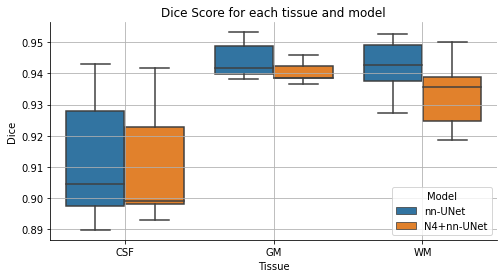

In [ ]:
df = pd.melt(dice_scores_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'Dice']

plt.figure(figsize=(8,4))
plt.title('Dice Score for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="Dice", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='lower right', title='Model')
plt.show()

In [ ]:
df[['Model', 'Tissue', 'Dice',]].groupby(['Model', 'Tissue']).mean()

Dice
Model      Tissue          
N4+nn-UNet CSF     0.910969
           GM      0.940385
           WM      0.933571
nn-UNet    CSF     0.912546
           GM      0.944376
           WM      0.941761

In [ ]:
df[['Model', 'Tissue', 'Dice',]].groupby(['Model', 'Tissue']).std()

Dice
Model      Tissue          
N4+nn-UNet CSF     0.020681
           GM      0.003711
           WM      0.012324
nn-UNet    CSF     0.022111
           GM      0.006359
           WM      0.010028

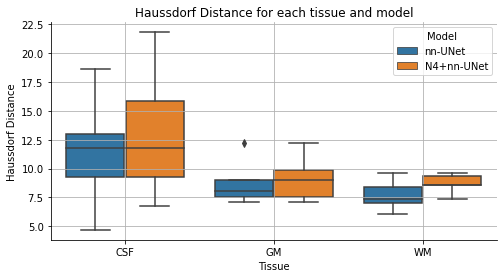

In [ ]:
df = pd.melt(hd_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'Haussdorf Distance']

plt.figure(figsize=(8,4))
plt.title('Haussdorf Distance for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="Haussdorf Distance", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='upper right', title='Model')
plt.show()

In [ ]:
df[['Model', 'Tissue', 'Haussdorf Distance',]].groupby(['Model', 'Tissue']).mean()

Haussdorf Distance
Model      Tissue                    
N4+nn-UNet CSF              13.092009
           GM                9.164337
           WM                8.704843
nn-UNet    CSF              11.461246
           GM                8.805988
           WM                7.686890

In [ ]:
df[['Model', 'Tissue', 'Haussdorf Distance',]].groupby(['Model', 'Tissue']).std()

Haussdorf Distance
Model      Tissue                    
N4+nn-UNet CSF               5.925449
           GM                2.039702
           WM                0.896637
nn-UNet    CSF               5.105343
           GM                2.040761
           WM                1.351024

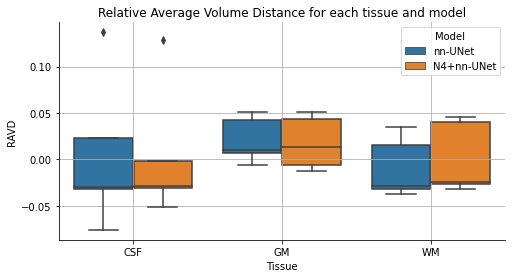

In [ ]:
df = pd.melt(ravd_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'RAVD']

plt.figure(figsize=(8,4))
plt.title('Relative Average Volume Distance for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="RAVD", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='upper right', title='Model')
plt.show()

In [ ]:
df[['Model', 'Tissue', 'RAVD',]].groupby(['Model', 'Tissue']).mean()

RAVD
Model      Tissue          
N4+nn-UNet CSF     0.003128
           GM      0.018116
           WM      0.000841
nn-UNet    CSF     0.004504
           GM      0.020889
           WM     -0.009432

In [ ]:
df[['Model', 'Tissue', 'RAVD',]].groupby(['Model', 'Tissue']).std()

RAVD
Model      Tissue          
N4+nn-UNet CSF     0.072602
           GM      0.028709
           WM      0.038785
nn-UNet    CSF     0.081929
           GM      0.024402
           WM      0.032438

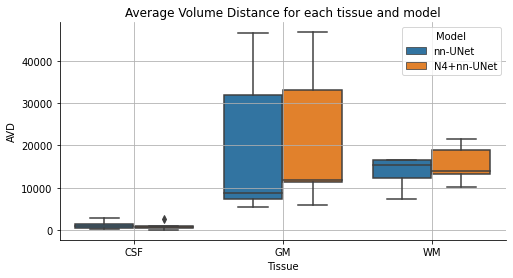

In [ ]:
df = pd.melt(avd_df, id_vars=['Model', 'Case'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df.columns = ['Model', 'Case', 'Tissue', 'AVD']

plt.figure(figsize=(8,4))
plt.title('Average Volume Distance for each tissue and model')
sns.boxplot(data=df, x="Tissue", y="AVD", hue="Model")
sns.despine()
plt.grid('h')
plt.legend(loc='upper right', title='Model')
plt.show()

In [ ]:
df[['Model', 'Tissue', 'AVD',]].groupby(['Model', 'Tissue']).mean()

AVD
Model      Tissue              
N4+nn-UNet CSF       983.465809
           GM      21842.350109
           WM      15540.280116
nn-UNet    CSF      1182.778696
           GM      19993.431547
           WM      13625.385344

In [ ]:
df[['Model', 'Tissue', 'AVD',]].groupby(['Model', 'Tissue']).std()

AVD
Model      Tissue              
N4+nn-UNet CSF       972.986321
           GM      17378.988370
           WM       4590.687383
nn-UNet    CSF       980.273636
           GM      18307.825333
           WM       3937.874346

# Predictions visualization

Test Image Shape:  (256, 5, 256)
Predicted Image Shape: (256, 5, 256)
Test Image Shape:  (256, 256, 5)
Predicted Image Shape: (256, 256, 5)


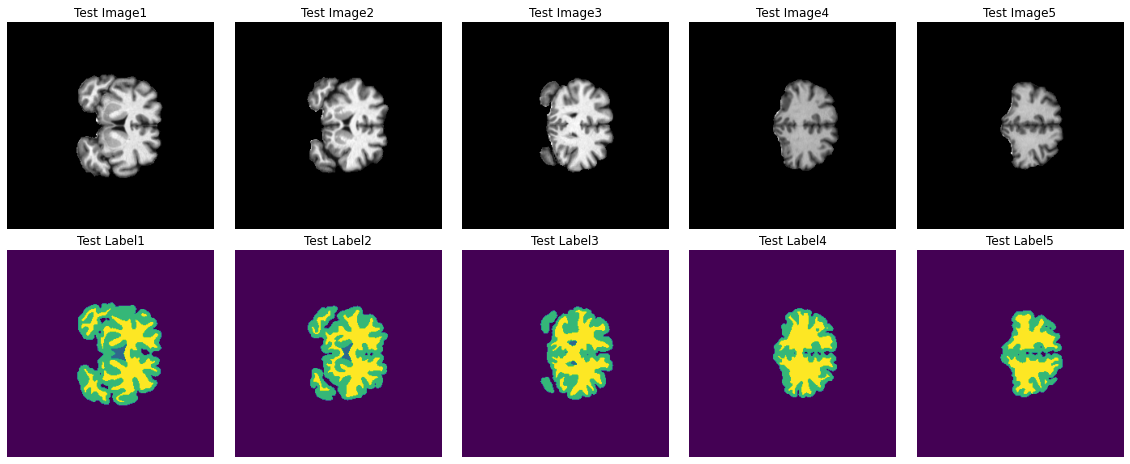

In [20]:
#visualizing the predicted results
# (re-run to see random pick-ups)
result_dir = '/content/drive/MyDrive/misa_fp/nnUNet/nnunet/nnUNet_Predictions/Task505_misa_fp'
test_img_name = os.listdir(test_dir)[np.random.randint(0,2)]
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,75:100:5,:]
predicted_img_name = test_img_name[:test_img_name.find('_0000.nii.gz')]+'.nii.gz'
predicted_label = np.array(nib.load(os.path.join(result_dir,predicted_img_name)).dataobj)[:,75:100:5,:]

print('Test Image Shape: ',test_img.shape)
print("Predicted Image Shape:",predicted_label.shape)

predicted_label = predicted_label.transpose(0, 2, 1)
test_img = test_img.transpose(0,2,1)

print('Test Image Shape: ',test_img.shape)
print("Predicted Image Shape:",predicted_label.shape)

max_rows = 2
max_cols = test_img.shape[2]
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Test Image'+str(idx+1))
    axes[0 ,idx].imshow(test_img[:,:,idx].squeeze(), cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Test Label'+str(idx+1))
    axes[1, idx].imshow(predicted_label[:,:,idx].squeeze())
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

Test Image Shape:  (256, 128, 5)
Predicted Image Shape: (256, 128, 5)


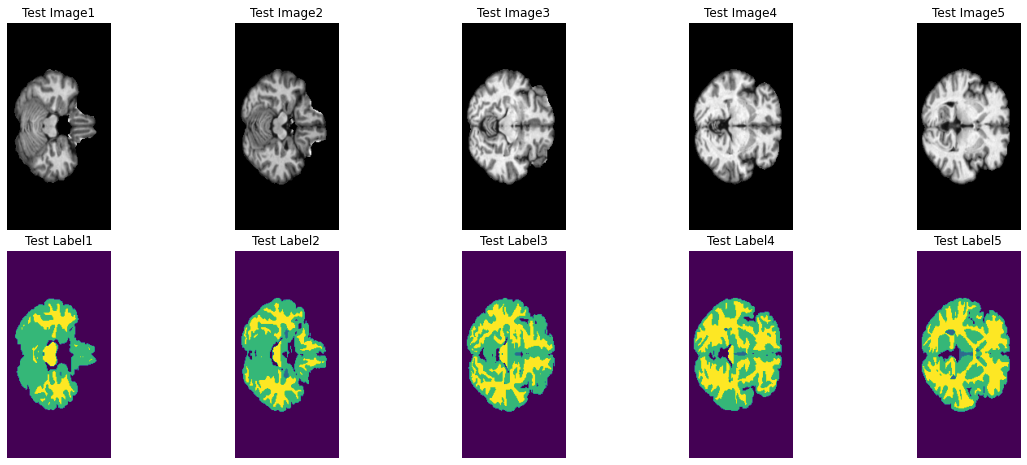

In [21]:
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,110:135:5]
predicted_img_name = test_img_name[:test_img_name.find('_0000.nii.gz')]+'.nii.gz'
predicted_label = np.array(nib.load(os.path.join(result_dir,predicted_img_name)).dataobj)[:,:,110:135:5]
print('Test Image Shape: ',test_img.shape)
print("Predicted Image Shape:",predicted_label.shape)

max_rows = 2
max_cols = test_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Test Image'+str(idx+1))
    axes[0 ,idx].imshow(test_img[:,:,idx].squeeze(), cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Test Label'+str(idx+1))
    axes[1, idx].imshow(predicted_label[:,:,idx].squeeze())
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()